In [1]:
import sys
from PIL import Image, ImageDraw
from IPython.display import display


In [2]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

In [3]:
class StackFrontier():
    def __init__(self) :
        self.frontier =[]

    def add(self, node):
        self.frontier.append(node)
    
    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)
    
    def empty(self):
        return len(self.frontier) == 0
    
    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node
        

In [4]:
class QueueFrontier(StackFrontier):
    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:0]
            return node

In [60]:
class Maze():
    
    def __init__(self, filename):
        
        # Read file and set height and width of maze
        with open(filename) as f:
            contents= f.read()
            
        self.cells = []   
        #Validate start and goal
        if contents.count("A")!=1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B")!=1:
            raise Exception("maze must have exactly one goal")
        
        #Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width=max(len(line) for line in contents)
        
        #Keep track of walls 
        self.walls = []
        for i in range(self.height):
            row=[]
            for j in range(self.width):
                try: 
                    if contents[i][j] == "A":
                        self.start = (i,j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i,j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)
        
        self.solution = None
    
    # Create an image of the maze
        self.image = self.generate_image()
    
    def print(self):
        solution = self.solution[1] if self.solution is not None else None 
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):               
                if col:
                    print("#", end="")
                elif (i,j) == self.start:
                    print("A", end="")
                elif (i,j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i,j) in solution:
                    print("*", end="") 
            print()
        print()
    
    def neighbors(self, state):
        row, col = state   
        
        #All possible actions
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]
        
        # Ensure actions are valid 
        result = []
        for action, (r,c) in candidates:
            try:
                if not self.walls[r][c]:
                    result.append((action, (r,c)))
            except IndexError:
                continue
        return result
    
    def solve(self):
        """Finds a solution to maze, if one exists."""
    
        # Keep track of number of states explored
        self.num_explored=0
        
        # Initialize frontier to just the starting position
        start = Node (state=self.start, parent=None, action=None)
        frontier = StackFrontier()
        frontier.add(start)
        
        # Initialize an empty explored set 
        self.explored = set()
        
        # Keep looping until solution found 
        while True:
            
            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("no solution")
            
            # Choose n node from the frontier 
            node = frontier.remove()
            self.num_explored += 1
            
            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                self.cells = cells
                #Follow parent nodes to find solution
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                # Set solution attribute
                self.solution = (actions, cells)
            
                # Set cells attribute
                self.cells = cells
                return
            # Mark node as explored
            self.explored.add(node.state)
            
            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state= state, parent=node, action=action)
                    frontier.add(child)
    
    def generate_image(self):
        self.solve()
        sol=self.cells[:-1]
        
        cell_size = 20  # Adjust the cell size based on your preferences
        border_size = 1  # Adjust the border size based on your preferences

        image_width = self.width * cell_size
        image_height = self.height * cell_size

        # Create a white image
        image = Image.new("RGB", (image_width, image_height), "white")
        draw = ImageDraw.Draw(image)

        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                x = j * cell_size
                y = i * cell_size

                # Draw the cell with a black border
                draw.rectangle(
                    [x, y, x + cell_size, y + cell_size],
                    outline="black",
                    fill="grey" if col else "yellow" if ((i,j) in sol) else "green" if (i, j) == self.start else "red" if (i, j) == self.goal else "white" ,
                    width=border_size,
                )
                # Draw 'A' and 'B' in white inside the colored cells
                if (i, j) == self.start:
                    draw.text((x + cell_size // 2, y + cell_size // 2), "A", fill="white", font=None, anchor="mm")
                elif (i, j) == self.goal:
                    draw.text((x + cell_size // 2, y + cell_size // 2), "B", fill="white", font=None, anchor="mm")


        return image

    def save_image(self, filename="maze_image.png"):
        self.image.save(filename)

    def display_image(self,filename="maze_image.png"):
        #self.image.show()
        self.image = Image.open(filename)
        display(self.image)
                                    

In [61]:
# Create an instance of the Maze class
my_maze = Maze(filename="maze1.txt")

# Solve the maze
my_maze.solve()

# Save the maze image to a file
my_maze.save_image("maze_image1.png")

# Display the maze image
my_maze.display_image("maze_image1.png")


FileNotFoundError: [Errno 2] No such file or directory: 'maze1.txt'

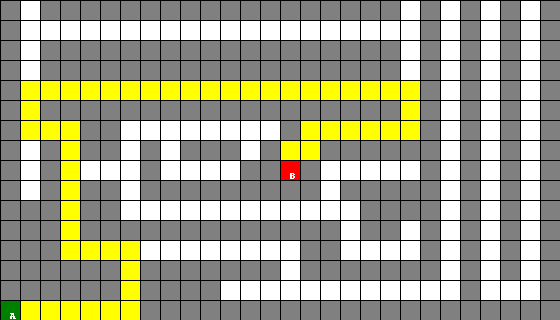

In [58]:
# Create an instance of the Maze class
my_maze1 = Maze(filename="maze2.txt")

# Solve the maze
my_maze1.solve()

# Save the maze image to a file
my_maze1.save_image(filename="maze_image22.png")

# Display the maze image
my_maze1.display_image(filename="maze_image22.png")


In [37]:
# Create an instance of the Maze class
my_maze = Maze(filename="maze2.txt")

# Solve the maze
my_maze.solve()

# Print the solution or the maze itself
my_maze.print()


#######################
#####
#######################
#######################
#####
#######################
###*********####
####*#####*#########
##****###B####
##*####################
###*#########
###*###################
###****######
######*#################
######*######
A******#####################

